<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930

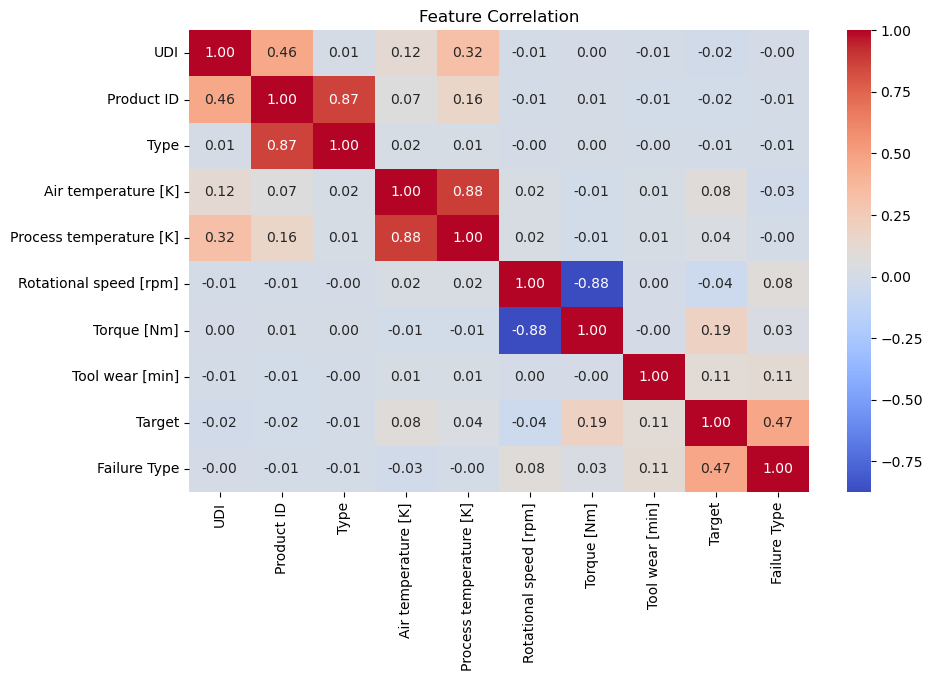

KeyError: "['Air temperature[K]', 'Process temperature[k]'] not in index"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv("predictive_maintainance.csv")

# Display basic information
print(df.info())
print(df.describe())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

#Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

#Encoding categorical columns
le = LabelEncoder()
categorical_columns = ['Product ID', 'Type', 'Failure Type']

for col in categorical_columns:
    if col in df.columns:  # Check if the column exists in df
        df[col] = le.fit_transform(df[col]) #Apply encoding

# Data visualization
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation')
plt.show()

# Handling missing values (example: filling with median)
df.fillna(df.median(), inplace=True)


# Normalizing numerical features
scaler = StandardScaler()
numerical_cols = ['Air temperature[K]', 'Process temperature[k]', 'Rotational speed [rpm]','Torque [Nm]', 'Tool wear [min]']  
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Save preprocessed data
df.to_csv('preprocessed_data.csv', index=False)

print("Data preprocessing completed and saved.")


In [9]:
import os
print(os.getcwd())


C:\Users\user
